In [258]:
import pandas as pd


In [259]:
df=pd.DataFrame(pd.read_csv("usedcar.csv"))

In [260]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [261]:

df.dropna(inplace=True)

In [262]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [263]:
df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float)
df['Mileage'] = df['Mileage'].str.extract('(\d+)').astype(float)
df["Power"]=df["Power"].replace("null bhp","0")
df["Power"].replace(" ","0")
df['Power'] = df['Power'].str.extract('(\d+)').astype(float)

In [264]:
import numpy as np

# Load your data


# Define a function to perturb numerical data
def perturb_data(df, n_samples):
    new_data = pd.DataFrame()
    for _ in range(n_samples // len(df) + 1):  # Ensure we generate enough samples
        temp_df = df.copy()
        for col in df.select_dtypes(include=[np.number]).columns:
            # Add Gaussian noise: mean=0, std=0.05 * standard deviation of the column
            noise = np.random.normal(0, 0.05 * temp_df[col].std(), size=temp_df[col].shape)
            temp_df[col] += noise
        new_data = pd.concat([new_data, temp_df], ignore_index=True)
    return new_data.sample(n_samples)  # Sample the required number of samples

# Augment the data
df1 = perturb_data(df, 120000)
print(df1.shape)

(120000, 11)


In [265]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
40847,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016.002903,41257.665573,Diesel,Automatic,First,12.844387,2133.635374,204.141500,4.906762
103691,Hyundai i10 Era 1.1,Kochi,2013.012348,36060.873008,Petrol,Manual,First,18.835760,1062.584291,70.120131,4.924211
42000,Hyundai Creta 1.6 VTVT S,Bangalore,2016.076147,41527.618057,Petrol,Manual,First,15.052207,1554.588078,120.249132,4.966723
53575,Maruti Wagon R LXI Minor,Jaipur,2008.835366,110328.983583,Petrol,Manual,Second,17.853994,1057.095965,64.147056,5.029025
19806,Honda City i DTEC VX,Hyderabad,2013.938954,78632.979859,Diesel,Manual,First,25.049322,1573.408757,98.284794,4.969876


In [266]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 40847 to 29317
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               120000 non-null  object 
 1   Location           120000 non-null  object 
 2   Year               120000 non-null  float64
 3   Kilometers_Driven  120000 non-null  float64
 4   Fuel_Type          120000 non-null  object 
 5   Transmission       120000 non-null  object 
 6   Owner_Type         120000 non-null  object 
 7   Mileage            120000 non-null  float64
 8   Engine             120000 non-null  float64
 9   Power              120000 non-null  float64
 10  Seats              120000 non-null  float64
dtypes: float64(6), object(5)
memory usage: 11.0+ MB


In [267]:
df1["Engine"].unique()

array([2133.63537407, 1062.58429135, 1554.58807783, ...,  793.29910393,
       1366.47140369, 1174.6078126 ])

In [268]:
df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [269]:
df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [270]:



def determine_price(engine_cc):
    if engine_cc <= 500:
        return np.random.randint(100000, 200000)
    elif engine_cc <= 1000:
        return np.random.randint(200000, 350000)
    elif engine_cc <= 2000:
        return np.random.randint(300000, 450000)
    elif engine_cc <= 3000:
        return np.random.randint(450000, 650000)
    else:
        return np.random.randint(600000, 1000000)

# Apply function to create new 'price' column
df1['price'] = df1['Engine'].apply(determine_price)

In [271]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,price
40847,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016.002903,41257.665573,Diesel,Automatic,First,12.844387,2133.635374,204.141500,4.906762,573614
103691,Hyundai i10 Era 1.1,Kochi,2013.012348,36060.873008,Petrol,Manual,First,18.835760,1062.584291,70.120131,4.924211,426830
42000,Hyundai Creta 1.6 VTVT S,Bangalore,2016.076147,41527.618057,Petrol,Manual,First,15.052207,1554.588078,120.249132,4.966723,437460
53575,Maruti Wagon R LXI Minor,Jaipur,2008.835366,110328.983583,Petrol,Manual,Second,17.853994,1057.095965,64.147056,5.029025,325904
19806,Honda City i DTEC VX,Hyderabad,2013.938954,78632.979859,Diesel,Manual,First,25.049322,1573.408757,98.284794,4.969876,318295


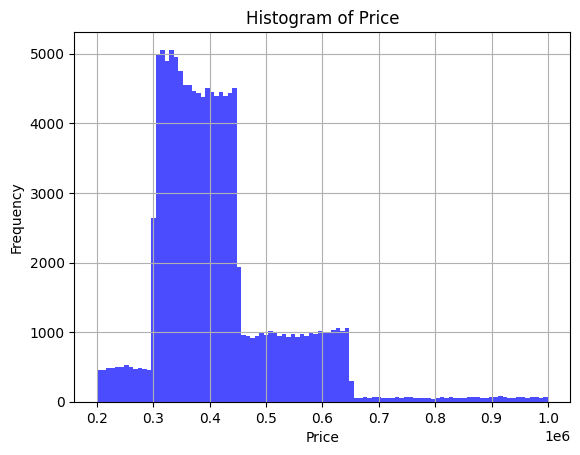

In [272]:
import matplotlib.pyplot as plt
plt.hist(df1['price'], bins=100, color='blue', alpha=0.7)  # More bins for more detail
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

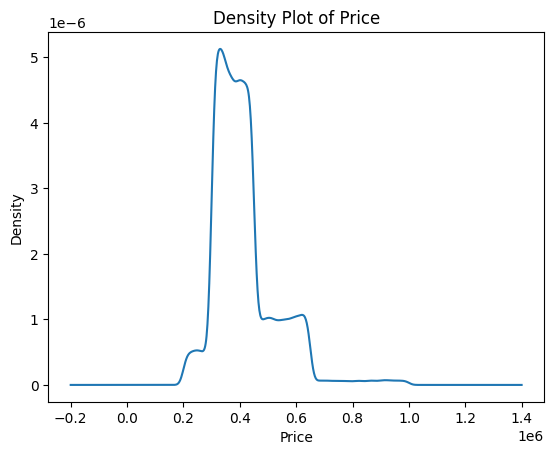

In [273]:
sampled_data = df1['price'].sample(n=100000, random_state=1)  # Adjust sample size as necessary
sampled_data.plot(kind='density')
plt.title('Density Plot of Price')
plt.xlabel('Price')
plt.show()

In [274]:
correlation_matrix=df1[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','price']].corr()
print(correlation_matrix)

                       Year  Kilometers_Driven   Mileage    Engine     Power  \
Year               1.000000          -0.185275  0.316448 -0.054326  0.067529   
Kilometers_Driven -0.185275           1.000000 -0.070742  0.094097  0.020750   
Mileage            0.316448          -0.070742  1.000000 -0.595920 -0.448829   
Engine            -0.054326           0.094097 -0.595920  1.000000  0.834691   
Power              0.067529           0.020750 -0.448829  0.834691  1.000000   
Seats              0.007977           0.089525 -0.312546  0.399018  0.103652   
price             -0.019837           0.068552 -0.478191  0.784503  0.624679   

                      Seats     price  
Year               0.007977 -0.019837  
Kilometers_Driven  0.089525  0.068552  
Mileage           -0.312546 -0.478191  
Engine             0.399018  0.784503  
Power              0.103652  0.624679  
Seats              1.000000  0.368431  
price              0.368431  1.000000  


In [275]:
df1.to_csv("usedcar1.csv",index=False)

In [279]:
numcols=['Year','Kilometers_Driven','Mileage','Engine','Power','Seats']

for cols in numcols:
    quartiles = df1[cols].quantile([0.25, 0.75])
    Q1, Q3 = quartiles[0.25], quartiles[0.75]
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df1 = df1[(df1[cols] >= lower_bound) & (df1[cols] <= upper_bound)]

In [280]:
correlation_matrix=df1[['Year','Kilometers_Driven','Mileage','Engine','Power','Seats','price']].corr()
print(correlation_matrix)

                       Year  Kilometers_Driven   Mileage    Engine     Power  \
Year               1.000000          -0.514162  0.339807 -0.101273  0.002054   
Kilometers_Driven -0.514162           1.000000 -0.018116  0.188608  0.054532   
Mileage            0.339807          -0.018116  1.000000 -0.343234 -0.398054   
Engine            -0.101273           0.188608 -0.343234  1.000000  0.862922   
Power              0.002054           0.054532 -0.398054  0.862922  1.000000   
Seats             -0.002360           0.001580 -0.005354  0.004868  0.004280   
price             -0.001076           0.052419 -0.120777  0.362587  0.284495   

                      Seats     price  
Year              -0.002360 -0.001076  
Kilometers_Driven  0.001580  0.052419  
Mileage           -0.005354 -0.120777  
Engine             0.004868  0.362587  
Power              0.004280  0.284495  
Seats              1.000000  0.002236  
price              0.002236  1.000000  


In [281]:
df1.to_csv("usedcar2.csv",index=False)